<a href="https://colab.research.google.com/github/ryuzin7/tugascui/blob/main/PCA_G_211_22_0035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Data.csv to Data.csv


In [ ]:
import pandas as pd
import numpy as np
import random
import operator
import math

df_full = pd.read_csv('Data.csv')
columns = list(df_full.columns)
features = columns[:len(columns) - 1]
class_labels = list(df_full[columns[-1]])
df = df_full[features]

num_attr = len(df.columns) - 1
k = 2
MAX_ITER = 100
n = len(df)
m = 2.00

def accuracy(cluster_labels, class_labels):
    tp = [0, 0]
    tn = [0, 0]
    fp = [0, 0]
    fn = [0, 0]

    for i in range(len(df)):
        if cluster_labels[i] == 0 and class_labels[i] == 'Yes':
            tp[0] += 1
        if cluster_labels[i] == 1 and class_labels[i] == 'No':
            tn[1] += 1
        if cluster_labels[i] == 0 and class_labels[i] == 'No':
            fp[0] += 1
        if cluster_labels[i] == 1 and class_labels[i] == 'Yes':
            fn[0] += 1

    a0 = (tp[0] + tn[0]) / (tp[0] + tn[0] + fn[0] + fp[0])
    p0 = tp[0] / (tp[0] + fp[0]) if tp[0] + fp[0] > 0 else 0.0
    r0 = tp[0] / (tp[0] + fn[0]) if tp[0] + fn[0] > 0 else 0.0

    a1 = (tp[1] + tn[1]) / (tp[1] + tn[1] + fn[1] + fp[1])
    p1 = tp[1] / (tp[1] + fp[1]) if tp[1] + fp[1] > 0 else 0.0
    r1 = tp[1] / (tp[1] + fn[1]) if tp[1] + fn[1] > 0 else 0.0

    accuracy = [a0 * 100, a1 * 100]
    precision = [p0 * 100, p1 * 100]
    recall = [r0 * 100, r1 * 100]

    return accuracy, precision, recall

def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x / summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

def calculateClusterCenter(membership_mat):
    cluster_centers = list()
    for j in range(k):
        x = list(zip(*membership_mat))[j]
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = list(map(sum, zip(*temp_num)))
        center = [z / denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers


def updateMembershipValue(membership_mat, cluster_centers): # Updating the membership value
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)
    return membership_mat

def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

def fuzzyCMeansClustering():
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    return cluster_labels, cluster_centers

print("printing the final membership matrix")
labels, centers = fuzzyCMeansClustering()

print("printing cluster centers")
print(centers)

a, p, r = accuracy(labels, class_labels)

print("Accuracy = " + str(a))
print("Precision = " + str(p))
print("Recall = " + str(r))



printing the final membership matrix
printing cluster centers
[[67.44538516022797, 66.85458777268354, 69.49103900072741, 70.23667500820004, 67.18205651297163, 67.20957803709283, 71.32733066709503, 71.21837990970873, 63.90009991656984, 63.51837632877388, 70.08185048826998, 70.69101538736476, 67.99128363184356, 69.00055276108459, 64.19151100734429, 61.946335403903376, 68.41831629445362, 67.37298811457113, 66.55482851101915, 64.400466000553, 74.26366145262823, 72.95477709578114, 68.37333862601277, 68.11907973731383, 60.246760847129046, 59.31062356948229, 62.83678909553138, 61.6824087925573, 64.29143211788093, 63.39173129304839, 71.68200500551258, 72.19137679721004, 62.154755100617045, 62.41854937516531, 65.40022962528879, 64.83676305785207, 65.72734687397983, 64.90929229049112, 68.9279065601267, 67.53711818812195, 66.11026724495844, 64.35607006857647, 55.619449559760234, 54.19246596071161], [67.44552395953731, 66.85450314336501, 69.49077917035483, 70.23605223065356, 67.18157982045902, 67.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine (7).csv


<ipython-input-24-f6f463767ae9>:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


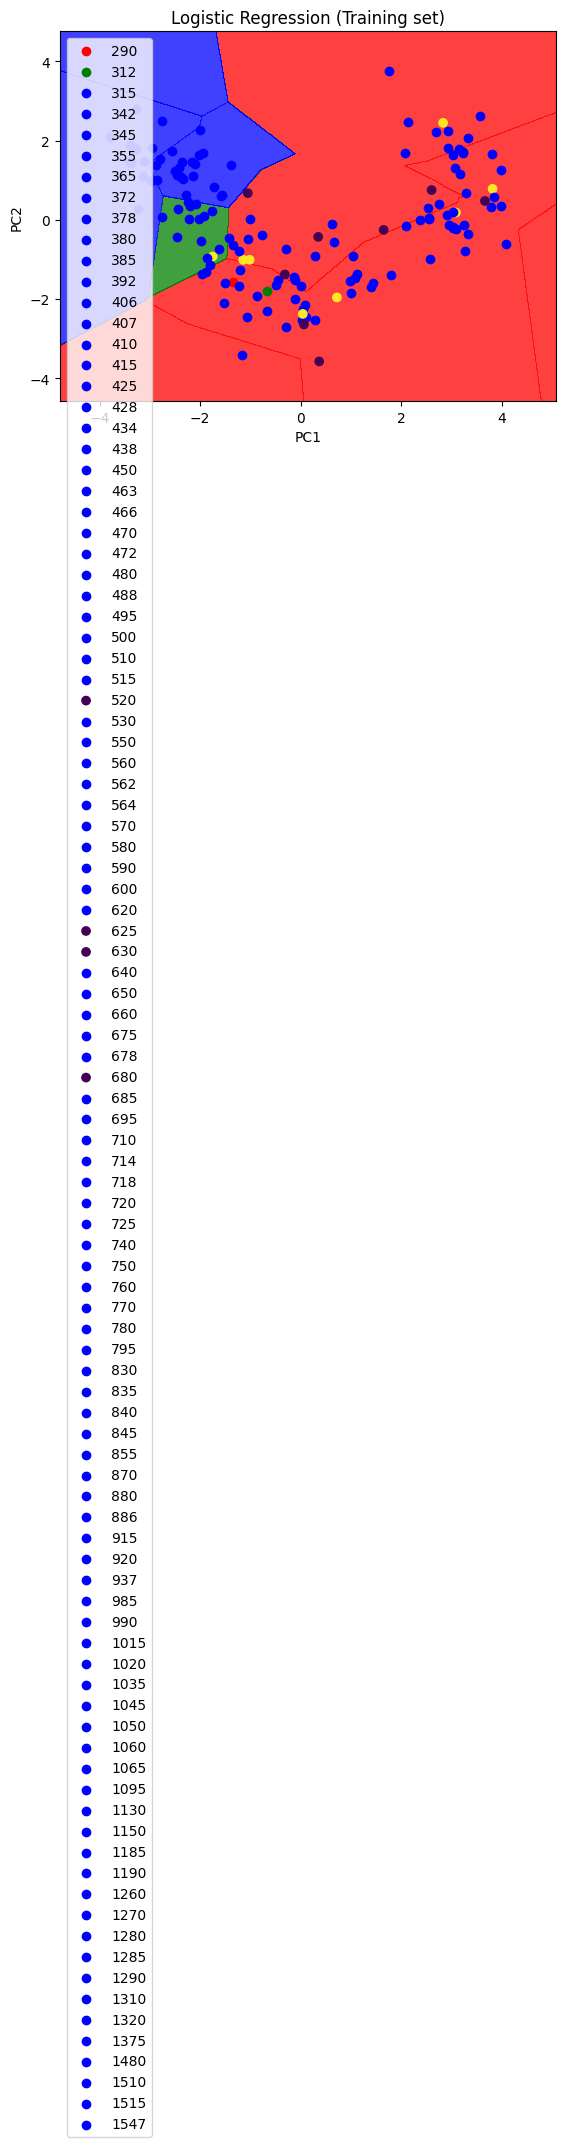

<ipython-input-24-f6f463767ae9>:66: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


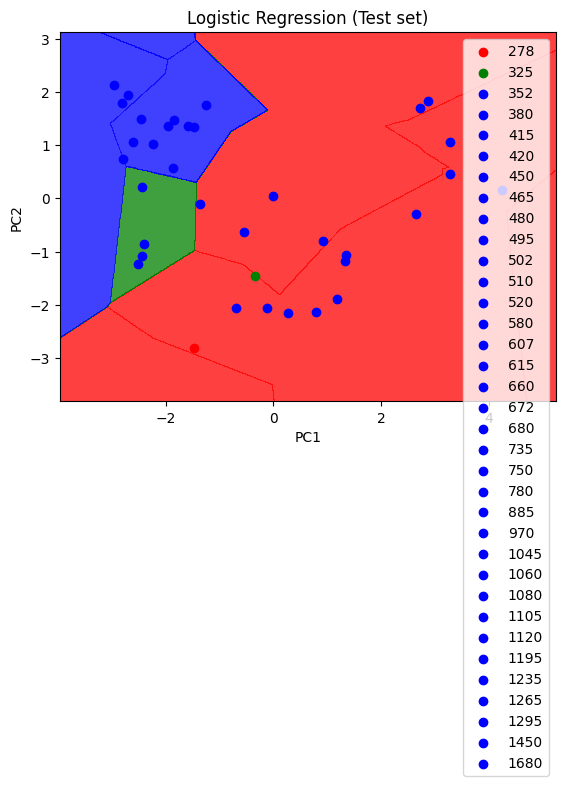

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
hasil_variance = pca.explained_variance_ratio_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
hasil_variance2 = pca.explained_variance_ratio_

from sklearn.linear_model import LogisticRegression
mesin_klasifikasi = LogisticRegression(random_state=0)
mesin_klasifikasi.fit(X_train, y_train)

y_pred = mesin_klasifikasi.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, mesin_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, mesin_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()